Deep Learning model for Ongoing DS_Capstone Project

Downloaded  the required dataset from "https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database" and importing it to this notebook.

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
diabetes_data = pd.read_csv('/content/diabetes.csv')

# Display the first few rows of the dataset
print(diabetes_data.head())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


Data Preprocessing

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Replace 0s with NaN in relevant columns
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_data[columns_to_replace] = diabetes_data[columns_to_replace].replace(0, np.nan)

# Fill NaN values with mean/median
diabetes_data['Glucose'].fillna(diabetes_data['Glucose'].mean(), inplace=True)
diabetes_data['BloodPressure'].fillna(diabetes_data['BloodPressure'].mean(), inplace=True)
diabetes_data['SkinThickness'].fillna(diabetes_data['SkinThickness'].median(), inplace=True)
diabetes_data['Insulin'].fillna(diabetes_data['Insulin'].median(), inplace=True)
diabetes_data['BMI'].fillna(diabetes_data['BMI'].median(), inplace=True)

# Features and target
X = diabetes_data.drop("Outcome", axis=1)
y = diabetes_data["Outcome"]

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


Building the model and training it

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Build the model
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary classification

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save the best model
checkpoint = ModelCheckpoint("best_model.keras", monitor="val_accuracy", save_best_only=True, mode="max")

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[checkpoint])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.6501 - loss: 0.6372 - val_accuracy: 0.6667 - val_loss: 0.6087
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6875 - loss: 0.6080 - val_accuracy: 0.7013 - val_loss: 0.5749
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7412 - loss: 0.5712 - val_accuracy: 0.7143 - val_loss: 0.5490
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7607 - loss: 0.5262 - val_accuracy: 0.7273 - val_loss: 0.5303
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7586 - loss: 0.5251 - val_accuracy: 0.7229 - val_loss: 0.5178
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7675 - loss: 0.5098 - val_accuracy: 0.7273 - val_loss: 0.5072
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7643 - loss: 0.4906 - val_accuracy: 0.7229 - val_loss: 0.5004
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7765 - loss: 0.4728 - val_accuracy: 0.7229 - val_loss

Evaluating the model

In [4]:
# Load the best saved model
best_model = tf.keras.models.load_model("best_model.keras")

# Evaluate on test data
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7604 - loss: 0.4824  
Test Accuracy: 0.7446


Visualizing the training history

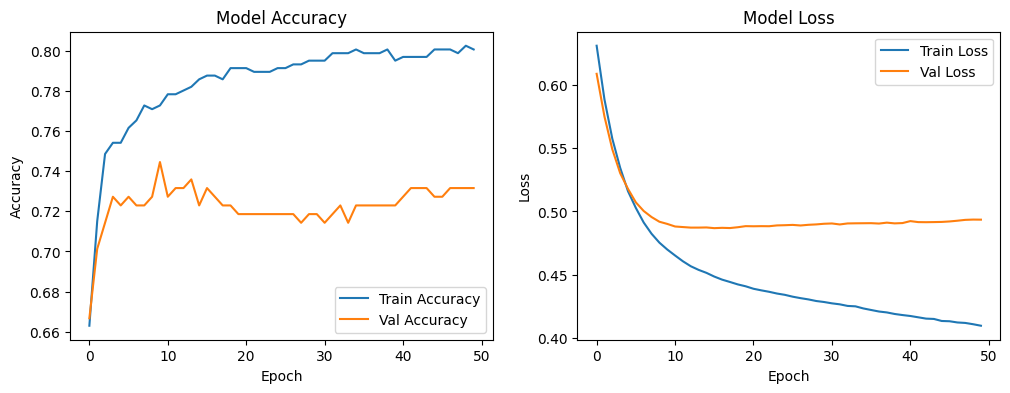

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.show()
